# Homework 6 

by Rahma Hayuning Astuti

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
df = pd.read_csv('D:\MLZoomcamp\module-6\Homework\housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [162]:
df.shape

(20640, 10)

## Preparing Dataset

In [163]:
df_subset = df.query("ocean_proximity in ('<1H OCEAN','INLAND')")
df_subset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [164]:
#fill missing value
df_subset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [165]:
df_subset = df_subset.fillna(0)
df_subset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [166]:
#split the dataset
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df_subset, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [167]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [168]:
# Apply the log transform to `median_house_value`

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [169]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [170]:
from sklearn.feature_extraction import DictVectorizer

In [171]:
#train 
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [172]:
#validation
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity`
* `total_rooms`
* `latitude`
* `population`

In [173]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score

In [174]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [175]:
#to look at the inside of the tree
from sklearn.tree import export_text
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



The answer is ocean_proximity=<1H OCEAN

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.045
* 0.245
* 0.545
* 0.845

In [176]:
df_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [177]:
from sklearn.ensemble import RandomForestRegressor

In [178]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [179]:
from sklearn.metrics import mean_squared_error

In [180]:
# Calculate the rmse
y_pred = rf.predict(X_val)
np.sqrt(mean_squared_error(y_val, y_pred))

0.24459962783255346

The answer is 0.245

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for retrieving the answer.

- 10
- 25
- 50
- 160


In [181]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1) 
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred)).round(3)
    scores.append((n, rmse))

In [182]:
scores[0]

(10, 0.245)

In [183]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
df_scores

,n_estimators,rmse
0,10,0.245
1,20,0.238
2,30,0.236
3,40,0.235
4,50,0.235
5,60,0.234
6,70,0.234
7,80,0.234
8,90,0.234
9,100,0.234


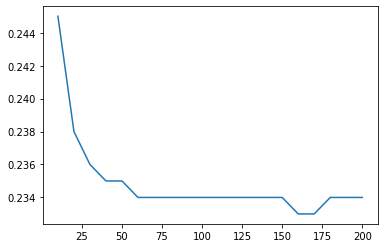

In [184]:
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))

It's stop decresing since 60, but the close one is 50. SO the answer is 50.

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25

In [185]:
scores = []
for d in[10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, 
                                    max_depth=d,
                                    random_state=1,
                                    n_jobs=-1) 
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        scores.append((d, n, rmse))

In [186]:
columns=['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,rmse
0,10,10,0.250510
1,10,20,0.247411
2,10,30,0.246377
3,10,40,0.245170
4,10,50,0.245689


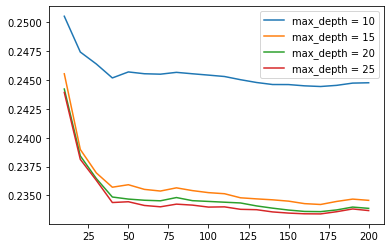

In [187]:
#plot
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label ='max_depth = %d' %d)
    
plt.legend()

The best max_depth is 25

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForest`Regressor`.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `total_rooms`
* `median_income`
* `total_bedrooms`
* `longitude`

In [188]:
rf = RandomForestRegressor(n_estimators=10, 
                           max_depth=20,
                           random_state=1, 
                           n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [189]:
rf.feature_importances_

array([0.01504314, 0.03006329, 0.10266505, 0.08585341, 0.33548579,
       0.21881985, 0.14745955, 0.02811472, 0.01543366, 0.02106153])

In [190]:
features = dv.get_feature_names_out()
feature_importance = rf.feature_importances_
zip_feature_importance = list(zip(features, feature_importance))
zip_feature_importance

[('households', 0.015043139111271224),
 ('housing_median_age', 0.030063286803328055),
 ('latitude', 0.10266505351248023),
 ('longitude', 0.085853413889788),
 ('median_income', 0.33548579019301683),
 ('ocean_proximity=<1H OCEAN', 0.21881985433078302),
 ('ocean_proximity=INLAND', 0.14745955406828146),
 ('population', 0.028114716700962206),
 ('total_bedrooms', 0.015433664373277032),
 ('total_rooms', 0.021061527016812055)]

In [191]:
df_feature_importance = pd.DataFrame(zip_feature_importance, columns=['features', 'feature_importance'])
df_feature_importance

,features,feature_importance
0,households,0.015043
1,housing_median_age,0.030063
2,latitude,0.102665
3,longitude,0.085853
4,median_income,0.335486
5,ocean_proximity=<1H OCEAN,0.218820
6,ocean_proximity=INLAND,0.147460
7,population,0.028115
8,total_bedrooms,0.015434
9,total_rooms,0.021062


In [192]:
df_feature_importance.sort_values(by='feature_importance', ascending=False).head()

,features,feature_importance
4,median_income,0.335486
5,ocean_proximity=<1H OCEAN,0.218820
6,ocean_proximity=INLAND,0.147460
2,latitude,0.102665
3,longitude,0.085853


The most importance is median_income

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value

In [193]:
import xgboost as xgb

In [194]:
features =list(dv.get_feature_names_out())
features

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [195]:
#replae special characters
for i in range (len(features)):
    features[i] = features[i].replace("=<", "_") 
    features[i] = features[i].replace("=", "_")
features

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity_1H OCEAN',
 'ocean_proximity_INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [196]:
# Create DMatrix for train and validation

dtrain = xgb.DMatrix(X_train, label = y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label = y_val, feature_names=features)

In [197]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

In [198]:
%%capture output 

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval = 5, #to print auc every 5 steps
                  evals=watchlist)

In [199]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [200]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [201]:
%%capture output 

#change eta to 0.1
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval = 5, #to print auc every 5 steps
                  evals=watchlist)

In [202]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [203]:
scores.keys()

dict_keys(['eta=0.3', 'eta=0.1'])

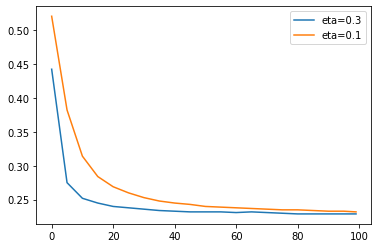

In [204]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc.round(3), label = key)
plt.legend()

In [205]:
scores

{'eta=0.3':     num_iter  train_auc  val_auc
 0          0    0.44350  0.44250
 1          5    0.25338  0.27463
 2         10    0.21444  0.25179
 3         15    0.19858  0.24522
 4         20    0.18524  0.23978
 5         25    0.17757  0.23830
 6         30    0.16888  0.23570
 7         35    0.16113  0.23416
 8         40    0.15542  0.23318
 9         45    0.14941  0.23190
 10        50    0.14536  0.23225
 11        55    0.14150  0.23197
 12        60    0.13719  0.23139
 13        65    0.13259  0.23158
 14        70    0.12943  0.23068
 15        75    0.12555  0.23039
 16        80    0.12192  0.22886
 17        85    0.11854  0.22888
 18        90    0.11496  0.22861
 19        95    0.11211  0.22908
 20        99    0.10989  0.22862,
 'eta=0.1':     num_iter  train_auc  val_auc
 0          0    0.52449  0.52045
 1          5    0.37822  0.38151
 2         10    0.30326  0.31427
 3         15    0.26538  0.28380
 4         20    0.24512  0.26882
 5         25    0.23026 

From the image, eta = 0.3 is the best